# Git 101

> Git is a free and open source distributed version control system designed to handle everything from small to very large projects with speed and efficiency.
>
> -- https://git-scm.com/

You may find that there is already tons of information in the internet about Git, so why another blog post? The target audience of most the resources are developers. This 101 should be a good starting point for system engineers. We don't need to understand all of the Git features but we should have a basic understanding of them. Most importantly, not be afraid to start using it and learn it better little by little.

Git is a version control system (VCS) but does some things differently from other versioning systems and has become the de facto standard VCS for software projects. It can handle very big projects like the Linux kernel and works perfectly fine for small projects as well. In Git, we call a project a repository and all the Git relevant data are stored in the `.git` directory. In order to demonstrate, we will create an empty directory and try to see the status of Git.

Git repository can be used for any deployment project with text files or configuration as well as a network configuration backup system. During the following examples, think about what kind of data could be in the repository. A simple example would be a deployment repository with a docker compose file and setting files.

In [1]:
mkdir test1 && cd test1 && ls -al

total 8
drwxr-xr-x 2 urs urs 4096 Jul 16 05:16 .
drwxr-xr-x 4 urs urs 4096 Jul 16 05:16 ..


In [2]:
git status

fatal: not a git repository (or any of the parent directories): .git


The command `git status` is definitely worth to remember. Of course there are Git GUI available and many editors or IDE softwares that have an integration but using the commands helps a lot to understand the concept. And it will allow you to be much faster anyway.

The error message tells us that Git cannot find the `.git` directory. To create a Git repository in our local machine, we can initiate a new one or clone one from a remote server. Let's see first how we can create a new one.

In [3]:
git init

Initialized empty Git repository in /home/urs/git101/test1/.git/


In [4]:
ls -al .git

total 40
drwxr-xr-x 7 urs urs 4096 Jul 16 05:18 .
drwxr-xr-x 3 urs urs 4096 Jul 16 05:18 ..
-rw-r--r-- 1 urs urs   23 Jul 16 05:18 HEAD
drwxr-xr-x 2 urs urs 4096 Jul 16 05:18 branches
-rw-r--r-- 1 urs urs   92 Jul 16 05:18 config
-rw-r--r-- 1 urs urs   73 Jul 16 05:18 description
drwxr-xr-x 2 urs urs 4096 Jul 16 05:18 hooks
drwxr-xr-x 2 urs urs 4096 Jul 16 05:18 info
drwxr-xr-x 4 urs urs 4096 Jul 16 05:18 objects
drwxr-xr-x 4 urs urs 4096 Jul 16 05:18 refs


In [5]:
git status

On branch master

No commits yet

nothing to commit (create/copy files and use "git add" to track)


Git created succesfully a new repository and now we can see the directory `.git`. We should never need to make any changes on this directory by hand. When we check the Git status, we see that we have a clear repository. We are working on the master branch (branches are one of the big advantages of Git - we will take a closer look later) and no commit is present. Meanwhile, no files are ready to be tracked. As the output above suggests, we will add some content to our test project.

In [6]:
cat > README.md <<EOF
# Test Project 1

It is always good to have a README file as a entry point of reading in a project.
The file doesn't have to be huge and perfect. As the project develops this file should too.

## ToDo

- create some content
- seize world domination
- save the planet
EOF

In [7]:
cat README.md

# Test Project 1

It is always good to have a README file as a entry point of reading in a project.
The file doesn't have to be huge and perfect. As the project develops this file should too.

## ToDo

- create some content
- seize world domination
- save the planet


In [8]:
git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	README.md

nothing added to commit but untracked files present (use "git add" to track)


After creating a new file with some content, we can see Git indicate that we have an untracked file. This means we have the file in our working directory but not in our Git repository. Now we can add the file to the `staging` index with the add command. Everything in the staging index is ready to be comitted.

In [9]:
git add README.md

In [10]:
git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)

	new file:   README.md



Now we are ready for the first commit. But what is a commit? A commit is a snapshot of the changed files. Working with snapshots and not deltas like other solutions gives some benefits. We can imagine a timeline with many commits and now we can easily go to any point of our timeline to see a specific snapshot at the chosen time. In Git we call the timeline a branch and as you can imagine, we can have multiple timelines. As we will see, we can create an new branch, have multiple commits and merge it together with another branch later. This is just one simple use case and as you get to know Git better, you will note this more and more.

A commit also has a commit message to describe the snapshot and it is highly recommended to have a commit message convention. For small commits, I prefer a short subject, starting with a verb which describes what the commit does, such as "Fix typo in README.md". For more complex commits you can also add more text. In addition, the commit includes the date and the author, plus their name and email address. We have to first set the name and email address before we can create a commit. With `--global` we can set the settings for all the repositories of our user. More information about the Git configuration and the location are available here https://git-scm.com/book/en/v2/Customizing-Git-Git-Configuration

In [11]:
git config user.name "ubaumann" && git config user.email demo@infrastructureascode.ch

In [12]:
git commit -m 'Init my awesone project'

[master (root-commit) 0d54dcd] Init my awesone project
 1 file changed, 10 insertions(+)
 create mode 100644 README.md


In [13]:
git status

On branch master
nothing to commit, working tree clean


Now we have a clean working directory again and one commit. We can check the result with the `log` command to see the history of our branch. At this point everything is only local.

In [14]:
git log

commit 0d54dcdf40e77f5a63b9d47fa5e45334b5f320b1 (HEAD -> master)
Author: ubaumann <demo@infrastructureascode.ch>
Date:   Thu Jul 16 05:21:55 2020 +0200

    Init my awesone project


Git is great for working in teams since the repositories are distributed. The normal Git binary can be used for setting up a server but in most cases you will use a special server or a cloud service. Products like GitLab, Bitbucket or GitHub are available as cloud services or can be installed on-premise. This are only a few products to name, and far away from a complete list. If a team in your company already uses a solution it will probably make sense to use the same one.

[Sebastian](https://github.com/seboschtion) created a good illustration which explains the Git principals of the working directory, the staging index and the location of the repository.

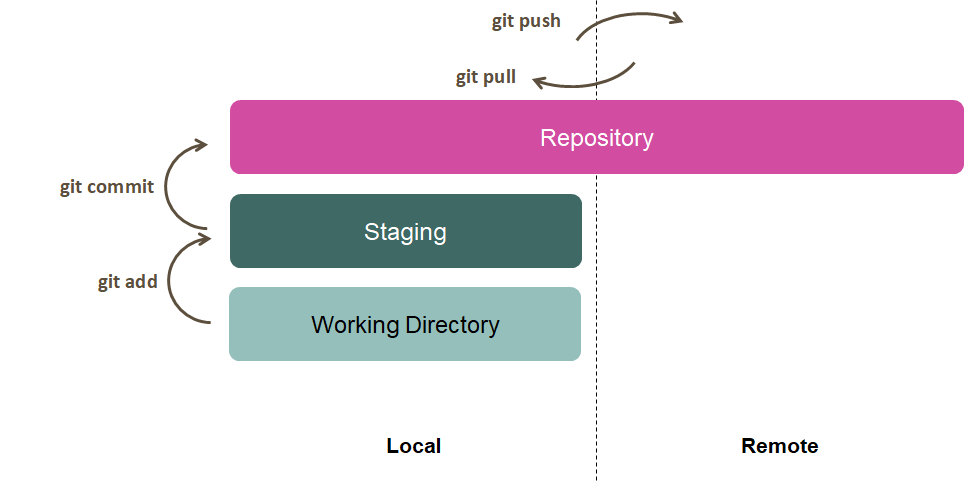

When working on our files we are in the working directory. As soon as we have made some progress and we want to commit it, we have to add the files with `git add` to the staging index. When all the files are ready we can create the commit with `git commit`. This will add the new commit to the branch (timeline) we are working on. All of this is only local and at the same time someone could have the possibility to add a commit and push it into the server. When you are not the only one working on a branch you should pull down potential commits to the local repository before creating the new commit.

With the command `git pull` we can synchronize the remote repository with the local one. The command `git push` synchronizes the local repository with the remote one. A repository can have multiple remote ones and can be added easily. If you have Read and Write permissions, this is defined by the remote server and the credentials you use. The default Remote is called `origin` and is added automatically if you clone a repository.

In [15]:
git remote add origin git@github.com:ubaumann/test1.git

In [16]:
git remote

origin


In [17]:
git push -u origin master

Counting objects: 3, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (2/2), done.
Writing objects: 100% (3/3), 408 bytes | 408.00 KiB/s, done.
Total 3 (delta 0), reused 0 (delta 0)
To github.com:ubaumann/test1.git
 * [new branch]      master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.


In [18]:
git status

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


On the server (in this case GitHub), the repository must exist and the user needs Write permission. Here we use SSH for the communication and the public SSH Key must be stored in your GitHub profile. For the first push we need to set the option `-u` (short for `--set-upstream`) for setting up the mapping to the branch in the remote repository. After the upstream branch is set, `git status` shows if the branch is up to date with it. As a result, we can work, make commits and push them to the Remote and pull changes made on the server or from other contributors.

As mentioned above we could also create the repository first on the server and clone it to the local machine. This works the same way as it would be when cloning an existing project. We can use the same repository to show this.

In [19]:
cd .. && pwd

/home/urs/git101


In [20]:
git clone git@github.com:ubaumann/test1.git test2

Cloning into 'test2'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [21]:
cd test2 && ls -al

total 16
drwxr-xr-x 3 urs urs 4096 Jul 16 05:25 .
drwxr-xr-x 5 urs urs 4096 Jul 16 05:25 ..
drwxr-xr-x 8 urs urs 4096 Jul 16 05:25 .git
-rw-r--r-- 1 urs urs  267 Jul 16 05:25 README.md


In [22]:
git status

On branch master
Your branch is up to date with 'origin/master'.

nothing to commit, working tree clean


After cloning the repository, we get a clean instance in the specified folder `test2`. If the folder is not specified, it would create the folder with the name of the repository `test1`, but in this case this folder already exists. The remote `origin` is already set and the local branch master is set to the upstream `origin/master`, as the command `git status` shows. This works really fast and many people choose to first create the repository on the server and clone it. Most servers display the two possible options with the commands when a new repository is created.

## Commit

This section covers some more options on how to work with the working directory, such as adding files to the staging index, discarding changes and should subsequently help to get started working with Git.

In [23]:
sed -i 's/some content/some awesome content/' README.md

In [24]:
echo "local temp file" > tmp.txt

In [25]:
git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	tmp.txt

no changes added to commit (use "git add" and/or "git commit -a")


The `git status` shows one modified and one new file. Before adding files to the staging, we can see what we actually changed with `git diff`. This command can also show the difference between commits and branches but here we will only be covering the basics.

In [26]:
git diff

diff --git a/README.md b/README.md
index 4267dc1..3504571 100644
--- a/README.md
+++ b/README.md
@@ -5,6 +5,6 @@ The file doesn't have to be huge and perfect. As the project develops this file
 
 ## ToDo
 
-- create some content
+- create some awesome content
 - seize world domination
 - save the planet


The diff shows the part of the files with the changes. This is handy to check the changes before creating a commit. To see only the changes in one file, the path to the file can be specified like `git diff README.md`.

When we are satisfied with the change we can add the file to the staging index and create a new commit. This works well with one or two files, but how can we handle it when we have many files?

In [27]:
mkdir files && touch files/{a..g}.txt && ls files

a.txt  b.txt  c.txt  d.txt  e.txt  f.txt  g.txt


In [28]:
git status --untracked-files=all

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	files/a.txt
	files/b.txt
	files/c.txt
	files/d.txt
	files/e.txt
	files/f.txt
	files/g.txt
	tmp.txt

no changes added to commit (use "git add" and/or "git commit -a")


After creating some files we can check if Git recognized them. The option `--untracked-files=all` shows untracked files in subdirectory as well. Without this option, the output would only show the subdirectory name and we could use `git status files/` to see more details. The `git add` command supports fileglobs like `files/*.txt`. So how could we add the files a.txt, b.txt and c.txt with one command to the staging?

In [29]:
git add files/[a-c].txt && git status

On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   files/a.txt
	new file:   files/b.txt
	new file:   files/c.txt

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	files/d.txt
	files/e.txt
	files/f.txt
	files/g.txt
	tmp.txt



In [30]:
git pull

Already up to date.


In [31]:
git commit -m "Add files/[a-c].txt"

[master 62ff61d] Add files/[a-c].txt
 3 files changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 files/a.txt
 create mode 100644 files/b.txt
 create mode 100644 files/c.txt


In [32]:
git push

Counting objects: 4, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (4/4), 332 bytes | 332.00 KiB/s, done.
Total 4 (delta 0), reused 0 (delta 0)
To github.com:ubaumann/test1.git
   0d54dcd..62ff61d  master -> master


In [33]:
git status --untracked-files=all

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	files/d.txt
	files/e.txt
	files/f.txt
	files/g.txt
	tmp.txt

no changes added to commit (use "git add" and/or "git commit -a")


Sooner or later we may want to delete a file in our working directory. Let's use the committed file `files/a.txt` to show the difference between just deleting the file on the file system with `rm` or by using the git command `git rm`.

In [34]:
git rm files/a.txt

rm 'files/a.txt'


In [35]:
ls files

b.txt  c.txt  d.txt  e.txt  f.txt  g.txt


In [36]:
git status

On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	deleted:    files/a.txt

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	files/d.txt
	files/e.txt
	files/f.txt
	files/g.txt
	tmp.txt



With the command `git rm files/a.txt` the file is erased on the filesystem and the change is already staged thus included in the next commit. As the status output indicates, we can unstage the change.

In [37]:
git reset HEAD files/a.txt

Unstaged changes after reset:
M	README.md
D	files/a.txt


In [38]:
git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   README.md
	deleted:    files/a.txt

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	files/d.txt
	files/e.txt
	files/f.txt
	files/g.txt
	tmp.txt

no changes added to commit (use "git add" and/or "git commit -a")


In [39]:
ls files

b.txt  c.txt  d.txt  e.txt  f.txt  g.txt


The file is still erased on the file system but the change is not staged and will be not included in the commit. Because Git still has the file in the last commit, we can discard the change and bring our file back.

In [40]:
git checkout -- files/a.txt && ls files

a.txt  b.txt  c.txt  d.txt  e.txt  f.txt  g.txt


When the files get deleted directly on the file system it will show up as a non staged change.

In [41]:
rm files/a.txt && git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   README.md
	deleted:    files/a.txt

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	files/d.txt
	files/e.txt
	files/f.txt
	files/g.txt
	tmp.txt

no changes added to commit (use "git add" and/or "git commit -a")


To stage this change, we have to add it to the staging area. The command `add` and `rm` would work here but since the file is already deleted, we will use `add` in this example.

In [42]:
git add files/a.txt && git status

On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	deleted:    files/a.txt

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	files/d.txt
	files/e.txt
	files/f.txt
	files/g.txt
	tmp.txt



As seen above, the reset command can remove files from the staging index. This is handy when we accidentally add a file. Without specifying a file, we can remove all files from the staging. If a file is added and more changes have to be done, the file can simply be added again to include the change in the commit. There are still some essential things to know about `git add`.

In [43]:
git reset HEAD

Unstaged changes after reset:
M	README.md
D	files/a.txt


In [44]:
git add --dry-run .

add 'README.md'
remove 'files/a.txt'
add 'files/d.txt'
add 'files/e.txt'
add 'files/f.txt'
add 'files/g.txt'
add 'tmp.txt'


The option `--dry-run` allows to see what the `add` command would add to the staging area. This allows to see how the different options work. In the example above, the root directory is specified (with the `.`) and all changed and untracked files will be added. 

In [45]:
git add --dry-run files

remove 'files/a.txt'
add 'files/d.txt'
add 'files/e.txt'
add 'files/f.txt'
add 'files/g.txt'


In [46]:
git add --dry-run --no-all .

add 'README.md'
add 'files/d.txt'
add 'files/e.txt'
add 'files/f.txt'
add 'files/g.txt'
add 'tmp.txt'


To ignore the removed files, `--no-all` or `--ignore-removal` can be used. In all these examples, the file `tmp.txt` is always included but some files like temporary files or local settings, we do not want to commit. For this we can use `gitignore` and the simplest way is to create the `.gitignore` file in the root directory of the repository and then add the patterns to match the files that are to be excluded.

In [47]:
echo "tmp.txt" >> .gitignore && git add --dry-run .

add 'README.md'
remove 'files/a.txt'
add '.gitignore'
add 'files/d.txt'
add 'files/e.txt'
add 'files/f.txt'
add 'files/g.txt'


It is recommended to keep the `git status` output always clean. It can save a lot of time. After adding changes to the staging index, a commit has to be created. The `commit` command also has an option `-a` (`--all`) to automatically stage all modified or deleted files but will not add untracked files.

In [48]:
git commit -a -m "Update README and delete files/a.txt"

[master 911acd3] Update README and delete files/a.txt
 2 files changed, 1 insertion(+), 1 deletion(-)
 delete mode 100644 files/a.txt


In [49]:
git show --oneline

911acd3 (HEAD -> master) Update README and delete files/a.txt
diff --git a/README.md b/README.md
index 4267dc1..3504571 100644
--- a/README.md
+++ b/README.md
@@ -5,6 +5,6 @@ The file doesn't have to be huge and perfect. As the project develops this file
 
 ## ToDo
 
-- create some content
+- create some awesome content
 - seize world domination
 - save the planet
diff --git a/files/a.txt b/files/a.txt
deleted file mode 100644
index e69de29..0000000


Every commit needs a commit message and whenever we have not specified the option `-m` (`--message`), the editor opens and the message can then be entered. An empty message aborts the commit. The message option can be used multiple times and is handy when you want to add more text but don't want to use the editor.

In [50]:
git add .gitignore

In [51]:
git commit -m "Add .gitignore" -m "The file 'tmp.txt' should be excluded"

[master 092c5ec] Add .gitignore
 1 file changed, 1 insertion(+)
 create mode 100644 .gitignore


In [52]:
git log -1 --format=%B

Add .gitignore

The file 'tmp.txt' should be excluded



Git and all the Git commands are really powerful and little by little you will discover more options. Above the format option is used only to show the raw body message. `git <command> --help` is always a good start to look for help.

In [53]:
git push

Counting objects: 7, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (6/6), done.
Writing objects: 100% (7/7), 691 bytes | 345.00 KiB/s, done.
Total 7 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:ubaumann/test1.git
   62ff61d..092c5ec  master -> master


## Branching / GitFlow

Branching is nothing new and is not only available in Git, but because Git works with snapshots, it is a really lightweight operation. This really changes the way how to work with branches. There are many good resources available online about Git Flow and how to work with branches. It always depends on the project but for most projects it is good practice to have a `master` branch with the stable release and a `develop` branch with a working in development version of your project, from which we  create for every new feature a separate branch. Do all the work, test it and merge it back in to the `develop`.

For example, take a repository with a docker-compose file and all the necessary files. The `master` branch would be the version  running in production, while the `develop` branch would be running in the testing environment and for every change a new branch wowuld have to be created from the `develop` branch, tested and merged back to the `develop` branch. 
When the `develop` branch is stable, a new version can be created and merged into the `master` so it can be deployed in production. 
Multiple new features can be developed at the same time from different engineers.

In [54]:
git branch

* master


In [55]:
git branch develop

In [56]:
git branch

  develop
* master


The command `git branch develop` creates from the current position a new branch `develop`, but the working directory is still on the branch `master`. Furthermore, the remote does not know anything about the new branch.

In [57]:
git checkout develop

Switched to branch 'develop'


In [58]:
git push -u origin develop

Total 0 (delta 0), reused 0 (delta 0)
remote: 
remote: Create a pull request for 'develop' on GitHub by visiting:
remote:      https://github.com/ubaumann/test1/pull/new/develop
remote: 
To github.com:ubaumann/test1.git
 * [new branch]      develop -> develop
Branch 'develop' set up to track remote branch 'develop' from 'origin'.


In [59]:
git status

On branch develop
Your branch is up to date with 'origin/develop'.

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	files/d.txt
	files/e.txt
	files/f.txt
	files/g.txt

nothing added to commit but untracked files present (use "git add" to track)


Switching between branches can be done with the command `checkout` and with the push option `-u` (`--set-upstream`) we defined to upstream branch. Now the remote repository also has the branch `develop`. Creating new branches and checking them out is an often needed operation and luckily there is a shorter way to do it. The command `checkout` offers an option `-b` to create the new branch directly. To demonstrate, let's create two feature branches and add a new file. It is important to start from the `develop` branch.

In [60]:
git pull

Already up to date.


In [61]:
git checkout -b feature1

Switched to a new branch 'feature1'


In [62]:
echo "Feature 1" > f1.txt && git add f1.txt && git commit -m "Add f1"

[feature1 9c48850] Add f1
 1 file changed, 1 insertion(+)
 create mode 100644 f1.txt


In [63]:
git push -u origin feature1

Counting objects: 3, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (2/2), done.
Writing objects: 100% (3/3), 339 bytes | 339.00 KiB/s, done.
Total 3 (delta 0), reused 0 (delta 0)
remote: 
remote: Create a pull request for 'feature1' on GitHub by visiting:
remote:      https://github.com/ubaumann/test1/pull/new/feature1
remote: 
To github.com:ubaumann/test1.git
 * [new branch]      feature1 -> feature1
Branch 'feature1' set up to track remote branch 'feature1' from 'origin'.


In [64]:
git checkout develop

Switched to branch 'develop'
Your branch is up to date with 'origin/develop'.


In [65]:
git checkout -b feature2

Switched to a new branch 'feature2'


In [66]:
echo "Feature 2" > f2.txt && git add f2.txt && git commit -m "Add f2"

[feature2 3bfd8d9] Add f2
 1 file changed, 1 insertion(+)
 create mode 100644 f2.txt


In [67]:
git push -u origin feature2

Counting objects: 3, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (2/2), done.
Writing objects: 100% (3/3), 337 bytes | 337.00 KiB/s, done.
Total 3 (delta 0), reused 0 (delta 0)
remote: 
remote: Create a pull request for 'feature2' on GitHub by visiting:
remote:      https://github.com/ubaumann/test1/pull/new/feature2
remote: 
To github.com:ubaumann/test1.git
 * [new branch]      feature2 -> feature2
Branch 'feature2' set up to track remote branch 'feature2' from 'origin'.


In [68]:
git checkout develop

Switched to branch 'develop'
Your branch is up to date with 'origin/develop'.


In [69]:
git log --oneline

092c5ec (HEAD -> develop, origin/master, origin/develop, origin/HEAD, master) Add .gitignore
911acd3 Update README and delete files/a.txt
62ff61d Add files/[a-c].txt
0d54dcd Init my awesone project


After creating two new branches, adding files and pushing it to the remote, the `develop` branch is still on the same state. A branch can definitely have multiple commits but we keep it simple here. With `git log` has many options and we can use it to see the new commits as well.

In [70]:
git log --all --oneline --graph

* 3bfd8d9 (origin/feature2, feature2) Add f2
| * 9c48850 (origin/feature1, feature1) Add f1
|/  
* 092c5ec (HEAD -> develop, origin/master, origin/develop, origin/HEAD, master) Add .gitignore
* 911acd3 Update README and delete files/a.txt
* 62ff61d Add files/[a-c].txt
* 0d54dcd Init my awesone project


Many GUI tools can possibly display this more nicely and the option format can be used to tweak the output. The `develop` and `master` branch are still at point when we add the `.gitignore` and the two new branches have each one more. With `git merge` we can merge the new features into our branch.

In [71]:
git merge feature1

Updating 092c5ec..9c48850
Fast-forward
 f1.txt | 1 +
 1 file changed, 1 insertion(+)
 create mode 100644 f1.txt


In [72]:
git status

On branch develop
Your branch is ahead of 'origin/develop' by 1 commit.
  (use "git push" to publish your local commits)

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	files/d.txt
	files/e.txt
	files/f.txt
	files/g.txt

nothing added to commit but untracked files present (use "git add" to track)


In [73]:
git log --all --oneline --graph

* 3bfd8d9 (origin/feature2, feature2) Add f2
| * 9c48850 (HEAD -> develop, origin/feature1, feature1) Add f1
|/  
* 092c5ec (origin/master, origin/develop, origin/HEAD, master) Add .gitignore
* 911acd3 Update README and delete files/a.txt
* 62ff61d Add files/[a-c].txt
* 0d54dcd Init my awesone project


Merging the first feature went smoothly and a closer looks shows `Fast-forward` in the output of the merge command. Fast-forward means that the pointer could be moved forward. For feature2 fast-forward (ff) will not be available because moving the pointer would imply losing the feature1 commit.

In [74]:
git merge --ff-only feature2

fatal: Not possible to fast-forward, aborting.


In [75]:
git merge feature2 -m "Merge branch 'feature2' into develop"

Merge made by the 'recursive' strategy.
 f2.txt | 1 +
 1 file changed, 1 insertion(+)
 create mode 100644 f2.txt


In [76]:
git log --all --oneline --graph

*   6eb7961 (HEAD -> develop) Merge branch 'feature2' into develop
|\  
| * 3bfd8d9 (origin/feature2, feature2) Add f2
* | 9c48850 (origin/feature1, feature1) Add f1
|/  
* 092c5ec (origin/master, origin/develop, origin/HEAD, master) Add .gitignore
* 911acd3 Update README and delete files/a.txt
* 62ff61d Add files/[a-c].txt
* 0d54dcd Init my awesone project


In [77]:
git push

Counting objects: 2, done.
Delta compression using up to 4 threads.
Compressing objects: 100% (2/2), done.
Writing objects: 100% (2/2), 303 bytes | 303.00 KiB/s, done.
Total 2 (delta 1), reused 0 (delta 0)
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To github.com:ubaumann/test1.git
   092c5ec..6eb7961  develop -> develop


Because it was already clear that we needed a new commit, the option `-m` can already be provided. Otherwise the editor would automatically open in order to provide a commit message.

In [78]:
git branch -d feature1

Deleted branch feature1 (was 9c48850).


In [79]:
git branch -d feature2

Deleted branch feature2 (was 3bfd8d9).


In [80]:
git push

Everything up-to-date


In [81]:
git push origin --delete feature1 feature2

To github.com:ubaumann/test1.git
 - [deleted]         feature1
 - [deleted]         feature2


Branches can be deleted to clean up the repository and that does not affect the commits. To delete branches on the remote, the command `git push <remote> --delete <branch>` has to be used.

Many server solutions make the collaboration easier and have great features. Common features are Pull Request (PR) or also called Merge Request, review and approval functions, issue tracking with creating new branches directly. In your working team you should define a working strategy. It totally makes sense to use the four eyes principle for merging branches, and can increase the quality greatly besides the test.

### Merge Conflict

Git tries to automatically merge changes, but in some cases Git will not be able to merge them, causing the merge to end up in a merge stage where the conflict has to be resolved by hand. This happens when, for example, two engineers change the same line.

In [82]:
git checkout -b todo_moon

Switched to a new branch 'todo_moon'


In [83]:
echo "- walk the moon" >> README.md && cat README.md

# Test Project 1

It is always good to have a README file as a entry point of reading in a project.
The file doesn't have to be huge and perfect. As the project develops this file should too.

## ToDo

- create some awesome content
- seize world domination
- save the planet
- walk the moon


In [84]:
git commit -am "Add walk the moon"

[todo_moon 4669cb7] Add walk the moon
 1 file changed, 1 insertion(+)


In [85]:
git checkout develop

Switched to branch 'develop'
Your branch is up to date with 'origin/develop'.


In the new branch we added a new ToDo to the `READMME.md`. To simulate some other changes before we merge the created branch we will also add a ToDo in the develop branch and commit it.

In [86]:
echo "- fully automated IT" >> README.md && cat README.md

# Test Project 1

It is always good to have a README file as a entry point of reading in a project.
The file doesn't have to be huge and perfect. As the project develops this file should too.

## ToDo

- create some awesome content
- seize world domination
- save the planet
- fully automated IT


In [87]:
git commit -am "Add fully automated IT"

[develop b9b6c8c] Add fully automated IT
 1 file changed, 1 insertion(+)


In [88]:
git merge todo_moon

Auto-merging README.md
CONFLICT (content): Merge conflict in README.md
Automatic merge failed; fix conflicts and then commit the result.


In [89]:
git status

On branch develop
Your branch is ahead of 'origin/develop' by 1 commit.
  (use "git push" to publish your local commits)

You have unmerged paths.
  (fix conflicts and run "git commit")
  (use "git merge --abort" to abort the merge)

Unmerged paths:
  (use "git add <file>..." to mark resolution)

	both modified:   README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	files/d.txt
	files/e.txt
	files/f.txt
	files/g.txt

no changes added to commit (use "git add" and/or "git commit -a")


As we can see the Auto-merging failed for the file `README.md` because Git does not know how solve it automatically. The `git status` shows that we are having unmerged paths and alse the files with the conflict. In the case that we would not want to deal with the conflict at that moment, the merge can be aborted with `git merge --abort`. Otherwise the conflict has to be fixed manually and commited.

In [90]:
cat README.md

# Test Project 1

It is always good to have a README file as a entry point of reading in a project.
The file doesn't have to be huge and perfect. As the project develops this file should too.

## ToDo

- create some awesome content
- seize world domination
- save the planet
<<<<<<< HEAD
- fully automated IT
- walk the moon
>>>>>>> todo_moon


In the file `<<<<<<<`, `=======` and `>>>>>>>` are showing the conflict and which part is coming from which. Git detected a change on the same line on both branches and does not know about the order of this command.

In [91]:
vim README.md -s <(printf 'G dd k dd 2k dd :m+\n :wq!\n') > /dev/null 2>&1 && cat README.md

# Test Project 1

It is always good to have a README file as a entry point of reading in a project.
The file doesn't have to be huge and perfect. As the project develops this file should too.

## ToDo

- create some awesome content
- seize world domination
- save the planet
- walk the moon
- fully automated IT


The above command starts Vim and uses normal mode commands. In short it goes to the last line, deletes (cut) the line, moves one up, then deletes the line, moves two lines up and finally delete this line as well. 
The active line will now be moved one line down and the file will be saved and closed. You can use your normal editor to fix the merge conflict.

In [92]:
git add README.md && git status

On branch develop
Your branch is ahead of 'origin/develop' by 1 commit.
  (use "git push" to publish your local commits)

All conflicts fixed but you are still merging.
  (use "git commit" to conclude merge)

Changes to be committed:

	modified:   README.md

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	files/d.txt
	files/e.txt
	files/f.txt
	files/g.txt



In [93]:
git commit -m "Fix merge conflict"

[develop b1ddcdc] Fix merge conflict


In [94]:
git status

On branch develop
Your branch is ahead of 'origin/develop' by 3 commits.
  (use "git push" to publish your local commits)

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	files/d.txt
	files/e.txt
	files/f.txt
	files/g.txt

nothing added to commit but untracked files present (use "git add" to track)


In [95]:
git log -4 --all --oneline --graph

*   b1ddcdc (HEAD -> develop) Fix merge conflict
|\  
| * 4669cb7 (todo_moon) Add walk the moon
* | b9b6c8c Add fully automated IT
|/  
*   6eb7961 (origin/develop) Merge branch 'feature2' into develop
|\  


After fixing the conflict, all changed files need to be added to the staging index and a commit is created. Now the merge is successfully done. In bigger pull requests it makes sense to merge the `develop` branch first to the feature branch, so to have the merge conflict already solved and tested. Moreover, making small features reduces the complexity.

## Revert or Reset Commit

Sometimes we need to undo a change. There are multiple ways of doing this and in this post we will take a look at `git revert` and `git reset`. We used the reset command already but it can do much more.

### Revert

Some commits ago we changed the ToDo "create some content" to "create some awesome content". With `git revert` we can get this change undone. 
First we have to find the commit. We could indeed use the log to find the commit message, but let's explore another approach.

In [96]:
git blame README.md

^0d54dcd (ubaumann 2020-07-16 05:21:55 +0200  1) # Test Project 1
^0d54dcd (ubaumann 2020-07-16 05:21:55 +0200  2) 
^0d54dcd (ubaumann 2020-07-16 05:21:55 +0200  3) It is always good to have a README file as a entry point of reading in a project.
^0d54dcd (ubaumann 2020-07-16 05:21:55 +0200  4) The file doesn't have to be huge and perfect. As the project develops this file should too.
^0d54dcd (ubaumann 2020-07-16 05:21:55 +0200  5) 
^0d54dcd (ubaumann 2020-07-16 05:21:55 +0200  6) ## ToDo
^0d54dcd (ubaumann 2020-07-16 05:21:55 +0200  7) 
911acd38 (ubaumann 2020-07-16 05:29:45 +0200  8) - create some awesome content
^0d54dcd (ubaumann 2020-07-16 05:21:55 +0200  9) - seize world domination
^0d54dcd (ubaumann 2020-07-16 05:21:55 +0200 10) - save the planet
4669cb70 (ubaumann 2020-07-16 05:37:38 +0200 11) - walk the moon
b9b6c8c7 (ubaumann 2020-07-16 05:38:06 +0200 12) - fully automated IT


With the blame command we can see who changed a line in a file and with which commit. Also, the commit id is shown directly. The term Blame may sound bad but it is actually a good thing plus handy. Although, it would be better to call it praise.

In [97]:
git show 911acd38 --oneline

911acd3 Update README and delete files/a.txt
diff --git a/README.md b/README.md
index 4267dc1..3504571 100644
--- a/README.md
+++ b/README.md
@@ -5,6 +5,6 @@ The file doesn't have to be huge and perfect. As the project develops this file
 
 ## ToDo
 
-- create some content
+- create some awesome content
 - seize world domination
 - save the planet
diff --git a/files/a.txt b/files/a.txt
deleted file mode 100644
index e69de29..0000000


After locating the commit, we will want to undo this. In this simple example it is easy to fix it by hand and create a new command but git has a neater solution. With `git revert` we can automatically undo this change.

In [98]:
git revert 911acd38 --no-edit

[develop 72f79be] Revert "Update README and delete files/a.txt"
 Date: Thu Jul 16 05:40:56 2020 +0200
 2 files changed, 1 insertion(+), 1 deletion(-)
 create mode 100644 files/a.txt


In [99]:
cat README.md

# Test Project 1

It is always good to have a README file as a entry point of reading in a project.
The file doesn't have to be huge and perfect. As the project develops this file should too.

## ToDo

- create some content
- seize world domination
- save the planet
- walk the moon
- fully automated IT


A new commit is created with the reverted change. The word *awesome* is deleted and the file `files/a.txt` is back. With the option `--no-edit` Git does not ask for the commit message. Because the old commit is still in the time line, the history is still correct.

### Reset

We used already `reset` to clean the staging index. Let's take a closer look at what this command does. The command is powerful so always be very aware of what are you doing, because executing this command **can result in data loss**.

The reset command updates the branch head to the specified commit. This means we can reset a branch to a commit and detach the newer commits. The operation has different modes and the three main ones are `--soft`, `--mixed` and `--hard`.

Soft mode changes the pointer in the local repository, mixed mode does the prior while also cleaning the staging index and the hard mode does both plus reseting the working directory.

In [100]:
echo "Extend feature 1" >> f1.txt && echo "Extend feature 2" >> f2.txt

In [101]:
git add f1.txt && git commit -m "Extend feature 1"

[develop 363e491] Extend feature 1
 1 file changed, 1 insertion(+)


In [102]:
git log -2 --oneline

363e491 (HEAD -> develop) Extend feature 1
72f79be Revert "Update README and delete files/a.txt"


In [103]:
git add f2.txt && git status

On branch develop
Your branch is ahead of 'origin/develop' by 5 commits.
  (use "git push" to publish your local commits)

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   f2.txt

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	files/d.txt
	files/e.txt
	files/f.txt
	files/g.txt



After extending both features and committing the change to feature1, we can reset the branch head to the second last commit. Because we do not need to clean the staging index, only the mode `--soft` is needed.

In [104]:
git reset --soft HEAD~

In [105]:
git status

On branch develop
Your branch is ahead of 'origin/develop' by 4 commits.
  (use "git push" to publish your local commits)

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	modified:   f1.txt
	modified:   f2.txt

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	files/d.txt
	files/e.txt
	files/f.txt
	files/g.txt



In [106]:
git log -2 --oneline

72f79be (HEAD -> develop) Revert "Update README and delete files/a.txt"
b1ddcdc Fix merge conflict


As the two commands above show, the last commit is "undone" and thus a new one can be created. To edit the last commit, the command `git commit` has an option `--amend` exacly for this use case. It can be handy when, for example, a file was forgotten to add.

`HEAD~` is one commit older as the `HEAD` and `HEAD~2` would be two commits older. To be sure that also the commit id can be used.

In [107]:
git commit -m "Extend feature 1 and 2 (second commit)"

[develop 3c01c36] Extend feature 1 and 2 (second commit)
 2 files changed, 2 insertions(+)


In [108]:
git reset --mixed HEAD~ && git status

Unstaged changes after reset:
M	f1.txt
M	f2.txt
On branch develop
Your branch is ahead of 'origin/develop' by 4 commits.
  (use "git push" to publish your local commits)

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   f1.txt
	modified:   f2.txt

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	files/d.txt
	files/e.txt
	files/f.txt
	files/g.txt

no changes added to commit (use "git add" and/or "git commit -a")


After resetting with `--mixed`,  the working directory is still the same but the files are not staged anymore. This is the  default mode and it is equivalent to `git reset HEAD~`.

In [109]:
git add f1.txt && git commit -m "Extend feature 1 (third time)"

[develop d24be3e] Extend feature 1 (third time)
 1 file changed, 1 insertion(+)


In [110]:
cat f2.txt

Feature 2
Extend feature 2


In [111]:
git reset --hard HEAD~ && git status

HEAD is now at 72f79be Revert "Update README and delete files/a.txt"
On branch develop
Your branch is ahead of 'origin/develop' by 4 commits.
  (use "git push" to publish your local commits)

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	files/d.txt
	files/e.txt
	files/f.txt
	files/g.txt

nothing added to commit but untracked files present (use "git add" to track)


In [112]:
cat f2.txt

Feature 2


The mode `--hard` clears the staging index and resets all tracked files. This command **can result in data loss**!

Resetting the pointer of a branch should only be done when the commits are not pushed to a remote or if no one else is working on this branch.

## Further Reading

Git is a huge topic so hopefully you were able to get a good basic understanding, and as mentioned several times, there are a ton of resources available. The following list contains recommendations for further reading about Git. 
	
- bisect --- Fast way to find the commit who introduced the bug (binary search)
- rebase --- Changing the order of commits, a nice alternative to merge
- squash --- Squash multiple commits into one
- stash --- put changes on the stash to continue later
- tagging --- set tags for example to mark release points
- Cherry Pick --- Applying a specific commit on another branch